In [112]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
#read in all the words
words = open('../makemore/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [114]:
len(words)

32033

In [115]:
# build the vocab
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [116]:
# build the dataset

block_size = 3
X, Y = [], []
for w in words:
    
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [105]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [117]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [118]:
# Embeddings
C = torch.randn((27, 2))

In [119]:
C[5]

tensor([ 0.1693, -1.6727])

In [120]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.1693, -1.6727])

In [121]:
C[torch.tensor([5,6,7])]

tensor([[ 0.1693, -1.6727],
        [ 0.7777,  0.7687],
        [ 1.5057, -0.5509]])

In [122]:
C[X]

tensor([[[ 0.8574,  1.5784],
         [ 0.8574,  1.5784],
         [ 0.8574,  1.5784]],

        [[ 0.8574,  1.5784],
         [ 0.8574,  1.5784],
         [ 0.1693, -1.6727]],

        [[ 0.8574,  1.5784],
         [ 0.1693, -1.6727],
         [-0.5294,  1.6178]],

        ...,

        [[-1.0872, -0.0756],
         [-1.0872, -0.0756],
         [ 1.0167, -2.3686]],

        [[-1.0872, -0.0756],
         [ 1.0167, -2.3686],
         [-1.0872, -0.0756]],

        [[ 1.0167, -2.3686],
         [-1.0872, -0.0756],
         [ 3.1147,  0.2424]]])

In [123]:
C[X].shape

torch.Size([228146, 3, 2])

In [124]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [125]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [126]:
torch.cat([emb[:, 0, :],emb[:, 1, :],emb[:, 2, :]], 1)

tensor([[ 0.8574,  1.5784,  0.8574,  1.5784,  0.8574,  1.5784],
        [ 0.8574,  1.5784,  0.8574,  1.5784,  0.1693, -1.6727],
        [ 0.8574,  1.5784,  0.1693, -1.6727, -0.5294,  1.6178],
        ...,
        [-1.0872, -0.0756, -1.0872, -0.0756,  1.0167, -2.3686],
        [-1.0872, -0.0756,  1.0167, -2.3686, -1.0872, -0.0756],
        [ 1.0167, -2.3686, -1.0872, -0.0756,  3.1147,  0.2424]])

In [127]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [128]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [129]:
a.shape

torch.Size([18])

In [130]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [131]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [132]:
emb.view(32, 6)

RuntimeError: shape '[32, 6]' is invalid for input of size 1368876

In [133]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [134]:
h

tensor([[-0.9430, -1.0000, -0.6126,  ...,  0.7031,  0.4938, -0.9995],
        [ 0.9978, -0.9868,  0.8017,  ...,  0.4555,  0.9966, -0.9645],
        [-0.9998, -0.8659, -0.9996,  ...,  0.9996, -0.9934, -0.9825],
        ...,
        [ 1.0000,  0.9997,  0.9975,  ..., -0.6701,  0.9933,  0.0251],
        [-1.0000,  0.9997,  0.5355,  ...,  0.9996, -0.9851,  0.5597],
        [ 0.9976,  0.9510, -0.3354,  ...,  0.3668, -0.9992, -0.9806]])

In [135]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [136]:
logits = h @ W2 + b2

In [137]:
logits

tensor([[  0.1265,  -1.2888,   6.2095,  ...,   3.6779,  19.6406, -17.6651],
        [-12.9100,  -1.6658,   1.0548,  ...,  15.7590,   0.2576,  -6.1476],
        [  0.1135,  -1.7898,   8.2526,  ...,  19.9340,   4.9071, -21.8006],
        ...,
        [  5.1275,  -7.7236,   2.3470,  ...,  16.3080,  -7.6747,   9.8112],
        [  4.4585,  -6.8124,   3.7097,  ...,   4.6003,  -2.7112,  -4.2648],
        [ -0.1755,  -4.8764,   2.8917,  ...,  -9.5093,   7.1878,  -5.7753]])

In [138]:
counts = logits.exp()

In [139]:
prob = counts / counts.sum(1, keepdims=True)

In [140]:
prob.shape

torch.Size([228146, 27])

In [141]:
loss = -prob[torch.arange(32), Y].log().mean()

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [142]:
loss

tensor(17.5785)

In [154]:
Xtr.shape, Ytr.shape

(torch.Size([182580, 3]), torch.Size([182580]))

In [188]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 500), generator=g)
b1 = torch.randn(500, generator=g)
W2 = torch.randn((500, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [189]:
sum(p.nelement() for p in parameters)

17081

In [190]:
for p in parameters:
    p.requires_grad = True

In [191]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [194]:
lri = []
lossi = []
stepi = []

for i in range(30000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) 
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = 0.1
    for p in parameters:
        p.data -= lr * p.grad
        
    #track stats
#     lri.append(lre[i])
    lossi.append(loss.log().item())
    stepi.append(i)
    
print(loss.item())

2.5128090381622314


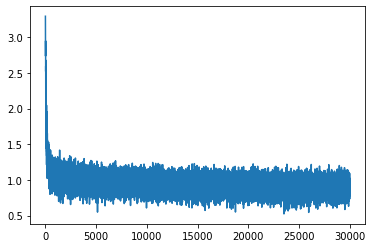

In [186]:
plt.plot(stepi, lossi)

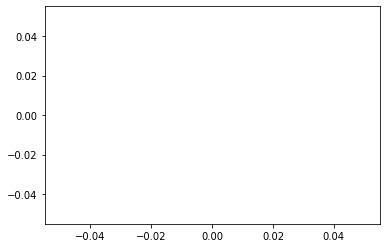

In [149]:
plt.plot(lri, lossi)

In [150]:
logits.max(1)

torch.return_types.max(
values=tensor([2.0626, 1.8033, 2.4622, 1.2666, 4.2318, 3.2973, 4.2318, 4.2318, 2.8213,
        2.2420, 4.2318, 2.7510, 1.9061, 4.2318, 4.2318, 5.0571, 3.0730, 1.4328,
        6.0361, 2.9731, 2.8056, 4.2318, 1.6119, 5.2269, 1.8074, 2.1387, 2.3289,
        1.9568, 3.1098, 1.7875, 4.2318, 2.7210], grad_fn=<MaxBackward0>),
indices=tensor([ 0,  1,  0,  0, 11, 15, 11, 11,  9, 15, 11, 14, 14, 11, 11,  1,  0, 14,
         1,  1,  9, 11,  1,  1,  0, 18,  0,  9,  0,  0, 11,  5]))

In [151]:
torch.randint(0, X.shape[0], (32, )) 

tensor([159805, 211387, 149980,  34890,  94117, 138421,  75582,  58791, 152063,
         10299,  36571, 100042, 132227, 206572,  68075,  94496,  91144,  40192,
        224059, 215067, 177471,    187,  52528,  91867, 165688, 154796, 224797,
        141872,  49573, 118886, 130357, 129991])

In [187]:
emb = C[Xdev] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) 
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4560, grad_fn=<NllLossBackward0>)

In [153]:
# train test val splits
# 80% 10% 10%



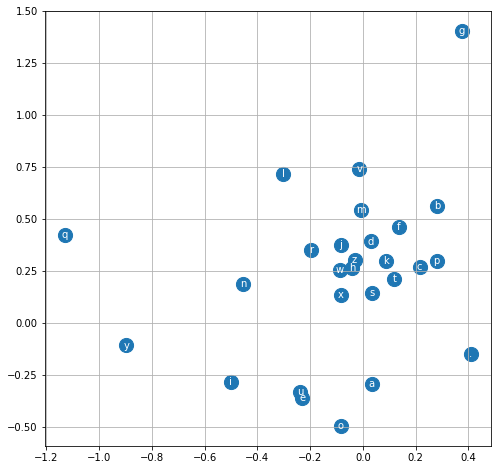

In [179]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [195]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carlah.
amelle.
khi.
myli.
tell.
hkandeller.
huylalee.
yat.
kaelic.
kamaratcyeihvikklet.
behla.
koin.
elijtey.
lilea.
jadilyo.
kelo.
dearystifkye.
killat.
elye.
lic.
